In [3]:
import construction as cs
import matplotlib.pyplot as plt

### read font
from matplotlib import font_manager

font_dirs = ['Barlow/']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

# set font
plt.rcParams['font.family'] = 'Barlow'

import networkx as nx
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load generated graphs SI


In [4]:
def compute_probs(data, n=10): 
    data = np.array(data)
    h, e = np.histogram(data, n)
    p = h/data.shape[0]
    return e, p

def support_intersection(p, q): 
    sup_int = (
        list(
            filter(
                lambda x: (x[0]!=0) & (x[1]!=0), zip(p, q)
            )
        )
    )
    return sup_int

def get_probs(list_of_tuples): 
    p = np.array([p[0] for p in list_of_tuples])
    q = np.array([p[1] for p in list_of_tuples])
    return p, q

def kl_divergence(p, q): 
    return np.sum(p*np.log(p/q))

def js_divergence(p, q):
    m = (1./2.)*(p + q)
    return (1./2.)*kl_divergence(p, m) + (1./2.)*kl_divergence(q, m)

def compute_kl_divergence(train_sample, test_sample, n_bins=10,js=False): 
    """
    Computes the KL Divergence using the support 
    intersection between two different samples
    """
    E = 0.0000000001
    e, p = compute_probs(train_sample, n=n_bins)
    _, q = compute_probs(test_sample, n=e)
    
    p = np.array(p) + E 
    q = np.array(q) + E 
    
    p = p/sum(p)
    q = q/sum(q)
    
    list_of_tuples = support_intersection(p, q)
    p, q = get_probs(list_of_tuples)
    
    if js:
        return js_divergence(p, q)
    else:
        return kl_divergence(p, q)


In [5]:
import networkx as nx
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

from topological_metrics import *

import os

# load distributions
## face to face

Time dependent measures:
- nb interactions o density (una delle due)
- interacting individuals
- new conversations
- durations oof contacts
- clustering coefficient
- S-metric
- assortativity
- aspl
- hclose
- hbet
- whbet
- conncomp
- hmod

Time aggregated measures: 
- edge strength
- close
- bet
- wbet

In [26]:
def load_topo_distributions(generator,file_name):
    
    den = np.load("topology_results/SI/"+generator+"/"+file_name+"/density.npy",allow_pickle=True)
    inter_indiv = np.load("topology_results/SI/"+generator+"/"+file_name+"/interacting_indiv.npy",allow_pickle=True)
    new_conv = np.load("topology_results/SI/"+generator+"/"+file_name+"/new_con.npy",allow_pickle=True)
    durat = np.load("topology_results/SI/"+generator+"/"+file_name+"/dur.npy",allow_pickle=True)
    clust = np.load("topology_results/SI/"+generator+"/"+file_name+"/clust.npy",allow_pickle=True)
    #s_met = np.load("topology_results/SI/"+generator+"/"+file_name+"/s_metric.npy",allow_pickle=True)
    ass = np.load("topology_results/SI/"+generator+"/"+file_name+"/ass.npy",allow_pickle=True)
    #asp = np.load("topology_results/SI/"+generator+"/"+file_name+"/asp.npy",allow_pickle=True)
    
    hclose = np.load("topology_results/SI/"+generator+"/"+file_name+"/hclo.npy",allow_pickle=True)
    hbet = np.load("topology_results/SI/"+generator+"/"+file_name+"/hbet.npy",allow_pickle=True)
    whbet = np.load("topology_results/SI/"+generator+"/"+file_name+"/whbet.npy",allow_pickle=True)
    conncomp = np.load("topology_results/SI/"+generator+"/"+file_name+"/concomp.npy",allow_pickle=True)
    hmod = np.load("topology_results/SI/"+generator+"/"+file_name+"/hmod.npy",allow_pickle=True)
    
    
    hs_met = np.load("topology_results/SI/"+generator+"/"+file_name+"/hs_metric.npy",allow_pickle=True)
    hasp = np.load("topology_results/SI/"+generator+"/"+file_name+"/hasp.npy",allow_pickle=True)
    #nb_inter = np.load("topology_results/"+generator+"/Multiple_run/distributions/"+file_name+"/nb_interactions.npy",allow_pickle=True)
    #stren = np.load("topology_results/"+generator+"/Multiple_run/distributions/"+file_name+"/streng.npy",allow_pickle=True 

    #return den,inter_indiv,new_conv,durat,clust,ass,hclose,hbet,whbet,conncomp,hmod,hs_met,hasp
    #return den,inter_indiv,new_conv,durat,clust,ass,conncomp,hclose,hbet,whbet,hmod,hs_met,hasp
    return den,inter_indiv,new_conv,durat,clust,ass,[conncomp],[hclose],[hbet],[whbet],[hmod],[hs_met],[hasp]

def load_topo_original(file_name):
    den = np.load("topology_results/original_distributions/"+file_name+"/density.npy",allow_pickle=True)
    inter_indiv = np.load("topology_results/original_distributions/"+file_name+"/interacting_indiv.npy",allow_pickle=True)
    new_conv = np.load("topology_results/original_distributions/"+file_name+"/new_con.npy",allow_pickle=True)
    durat = np.load("topology_results/original_distributions/"+file_name+"/dur.npy",allow_pickle=True)
    clust = np.load("topology_results/original_distributions/"+file_name+"/clust.npy",allow_pickle=True)
    #s_met = np.load("topology_results/original_distributions/"+file_name+"/s_metric.npy",allow_pickle=True)
    ass = np.load("topology_results/original_distributions/"+file_name+"/ass.npy",allow_pickle=True)
    #asp = np.load("topology_results/original_distributions/"+file_name+"/asp.npy",allow_pickle=True)
    hclose = np.load("topology_results/original_distributions/"+file_name+"/hclo.npy",allow_pickle=True)
    hbet = np.load("topology_results/original_distributions/"+file_name+"/hbet.npy",allow_pickle=True)
    whbet = np.load("topology_results/original_distributions/"+file_name+"/whbet.npy",allow_pickle=True)
    conncomp = np.load("topology_results/original_distributions/"+file_name+"/concomp.npy",allow_pickle=True)
    hmod = np.load("topology_results/original_distributions/"+file_name+"/hmod.npy",allow_pickle=True)
    
    hs_met = np.load("topology_results/original_distributions/"+file_name+"/hs_metric.npy",allow_pickle=True)
    hasp = np.load("topology_results/original_distributions/"+file_name+"/hasp.npy",allow_pickle=True)
    #stren = np.load("topology_results/original_distributions/"+file_name+"/streng.npy",allow_pickle=True)
    #nb_inter = np.load("topology_results/original_distributions/"+file_name+"/nb_interactions.npy",allow_pickle=True)
    
    return den,inter_indiv,new_conv,durat,clust,ass,[conncomp],[hclose],[hbet],[whbet],[hmod],[hs_met],[hasp]



def compute_counts(ro,e):
    counts = []
    e = np.array(e)
    for i in range(len(ro)-1):
        r1 = ro[i]
        r2 = ro[i+1]
        ee = e[e>r1]
        count = ee[ee<=r2]
        counts.append(len(count))
    return counts

def compute_multpile_counts(ranges,ee):
    counts = []
    for e in ee:
        counts.append(compute_counts(ranges,e))
    return counts

# example of calculating the kl divergence between two mass functions
from math import log2
from scipy.stats import wasserstein_distance as em
from scipy.stats import ks_2samp


def comp_stat(ori,competitor,dist,names):
    res = dict()
    c = 0
    for met in competitor:
        tmp = []
        for comp in met:
            if dist == "js":
                val = compute_kl_divergence(ori[c], comp, n_bins=50,js=True)
            elif dist == "kl":
                val = compute_kl_divergence(ori[c], comp, n_bins=50,js=False)
            elif dist == "em":
                val = em(ori[c][0],comp)
            elif dist == "ks":
                val = (ks_2samp(ori[c][0],comp)[0])
                
            tmp.append(val)
            
        res[names[c]] = (np.mean(tmp),np.std(tmp))
        c = c + 1 
        
    return res

In [27]:


def load_comp_metric(file_name,dist="ks"):
    o_in = load_topo_original(file_name)
    e_in = load_topo_distributions("etngen",file_name)
    t_in = load_topo_distributions("taggen",file_name)
    #d_in = load_topo_distributions("dymgen",file_name)
    #s_in = load_topo_distributions("stmgen",file_name)

    res_e = comp_stat(o_in,e_in,dist= dist,names=names)
    #res_d = comp_stat(o_in,d_in,dist= dist,names=names)
    #res_s = comp_stat(o_in,s_in,dist= dist,names=names)
    res_t = comp_stat(o_in,t_in,dist= dist,names=names)

    x1 = np.array(list(res_e.values()))
    #x2 = np.array(list(res_s.values()))
    x3 = np.array(list(res_t.values()))
    #x4 = np.array(list(res_d.values()))
    
    return x1,x3


# ks
ks con solo aspl e s-metric su ore

In [77]:
names = ["Density","Interacting\nindividuals","New conversations","Duration of contacts","Global clustering \ncoefficient",
         "Assortativity","Nb connected \ncomponents","Hour \ncloseness","Hour \nbetweenness","Weighted hour \nbetweenness",
         "Hour \nmodularity","Hour \nS-metric","Hour average shortest\npath length"]

In [100]:
dist = "ks"
x1h,x3h = load_comp_metric("High_School12",dist=dist)
x1w,x3w = load_comp_metric("High_School13",dist=dist)
x1s,x3s = load_comp_metric("primary_school",dist=dist)

/tmp/ipykernel_23213/2146551642.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_yticklabels(names)
/tmp/ipykernel_23213/2146551642.py:89: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.tight_layout()


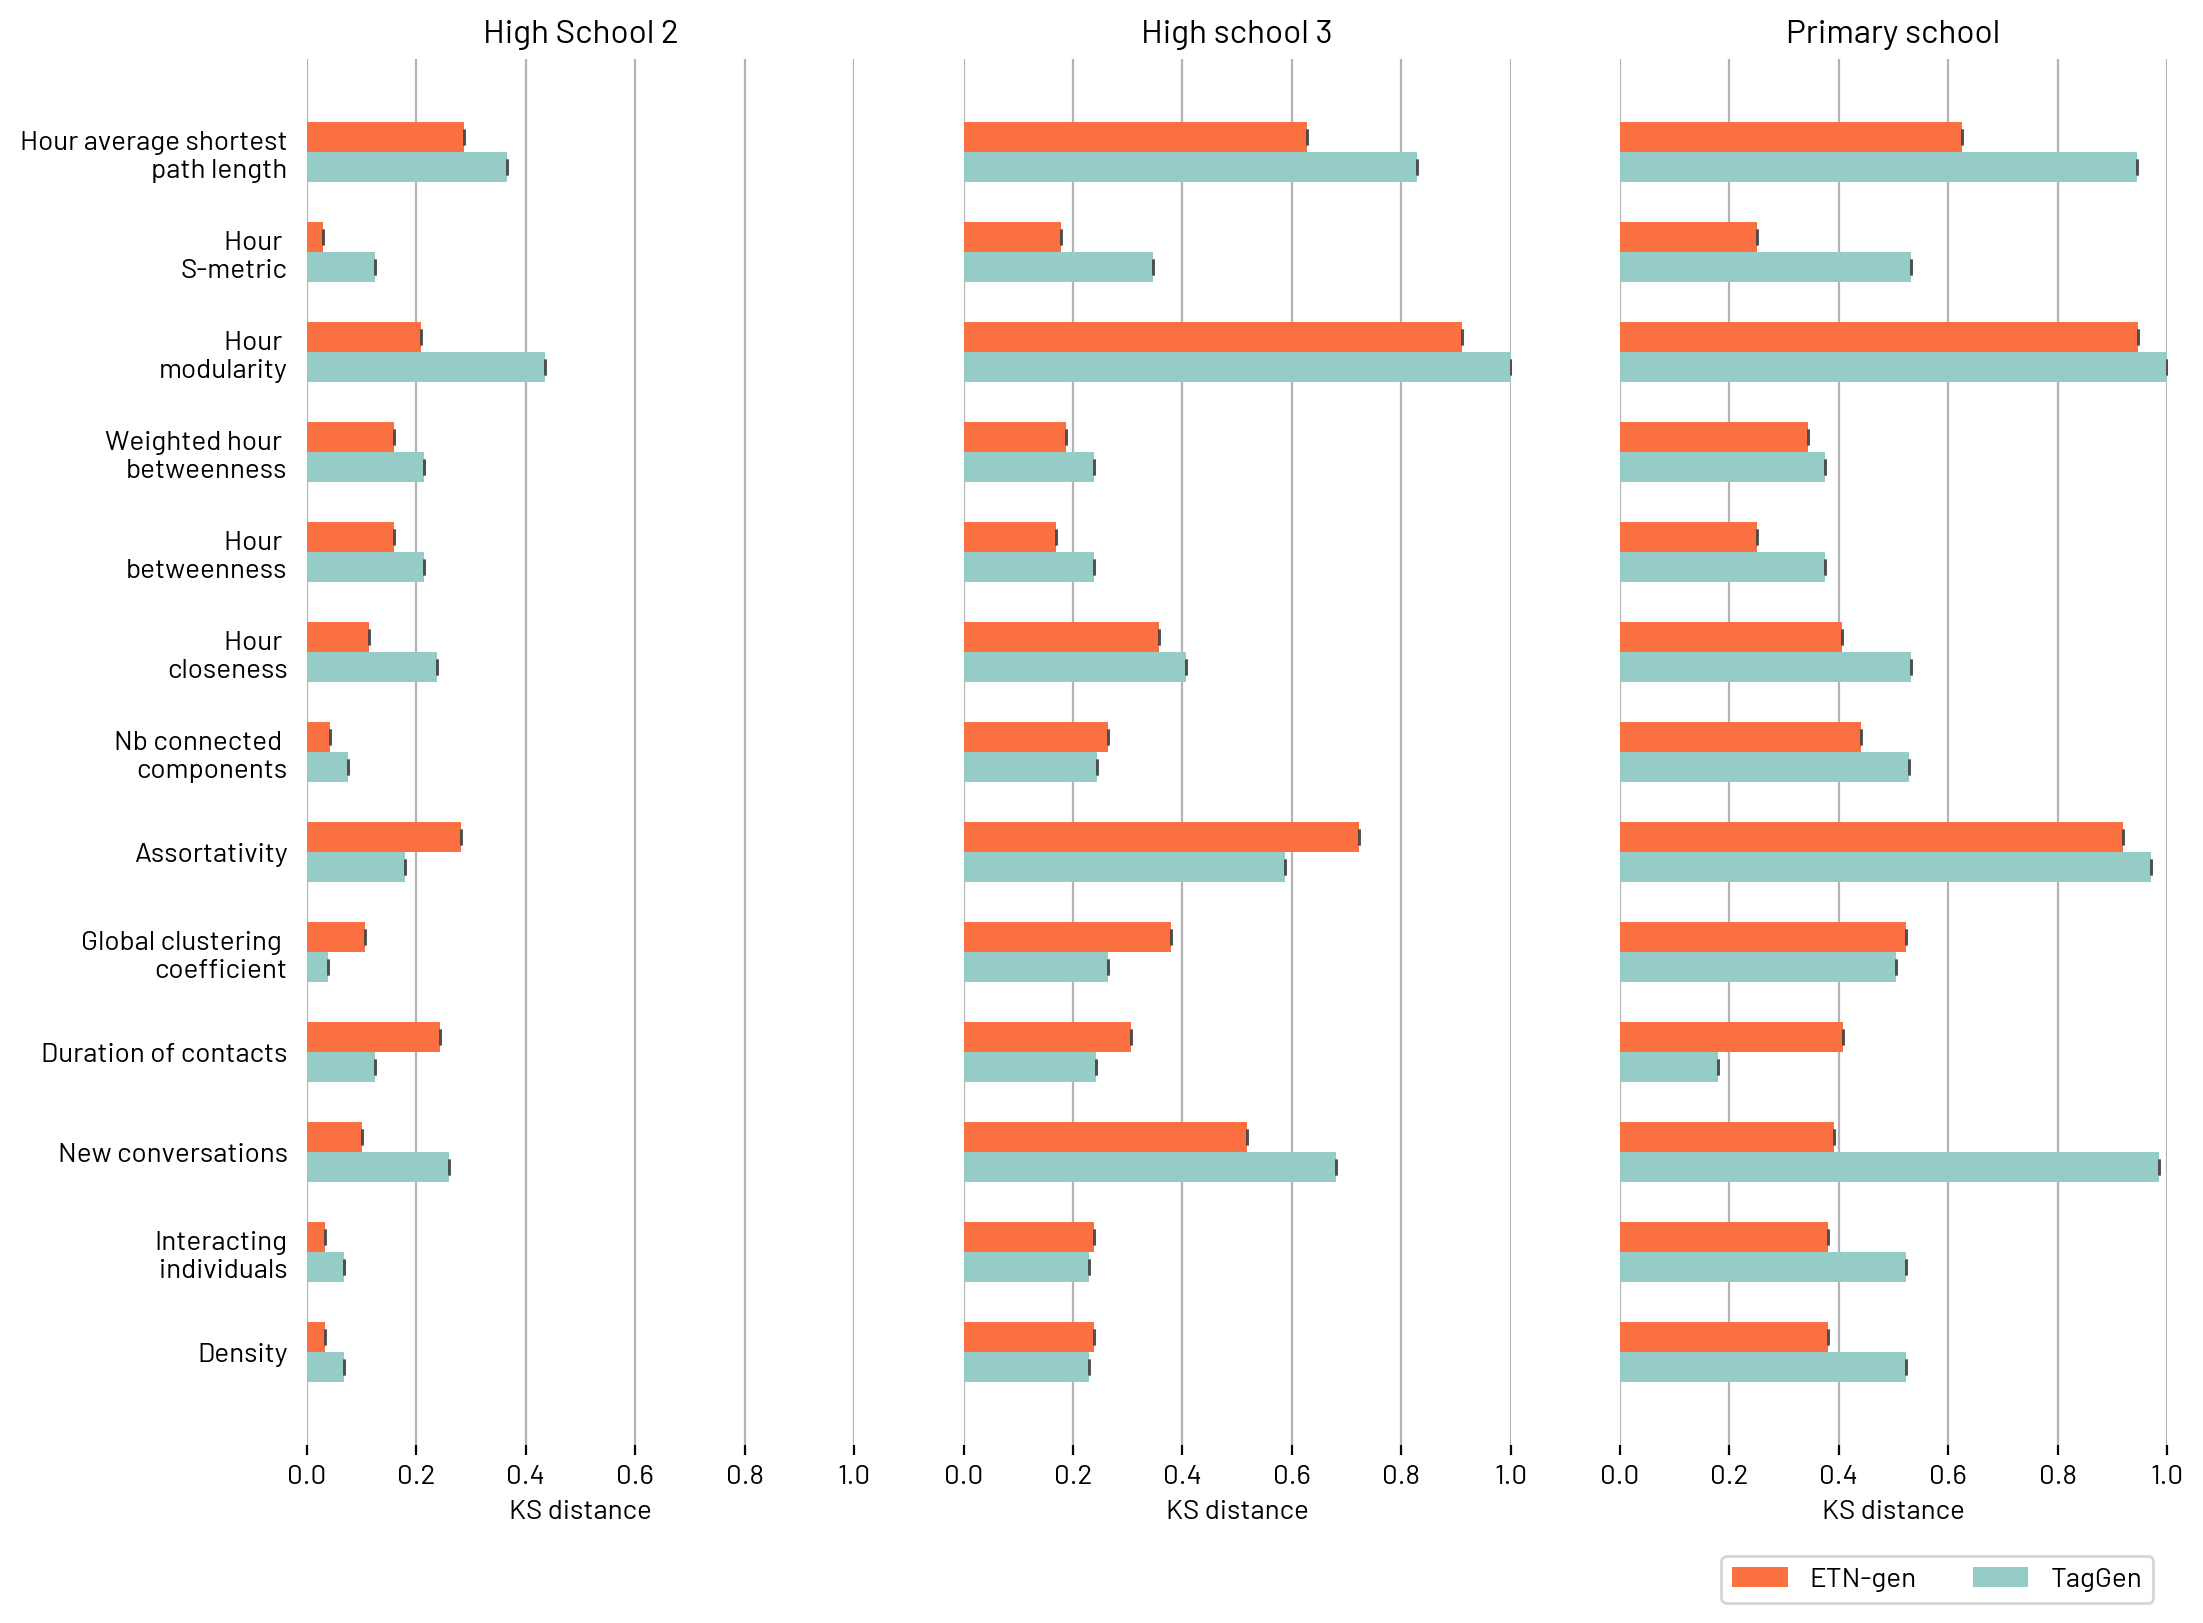

In [101]:
ORIGINAL_COLOR = '#474747' #dark grey
ETN_COLOR =  '#fb7041' #'#E5865E' # arancio
TAG_COLOR = '#96ccc8' # light blue
STM_COLOR = '#bad1f2' #8F2E27' # rosso
DYM_COLOR = '#559ca6' # teal
error_bar_style = dict(ecolor=ORIGINAL_COLOR, alpha=0.8, lw=1.5, capsize=3, capthick=1)

x = np.arange(13)
width = 0.3


fig, ax = plt.subplots(1,3,figsize=(12,9))

ax[0].title.set_text("High School 2")
ax[0].barh(x + 0.15, x1h[:,0], width, xerr=x1h[:,1],label='ETN-gen',color=ETN_COLOR, error_kw=error_bar_style)
ax[0].barh(x - 0.15, x3h[:,0], width, xerr=x3h[:,1],label='TagGen',color=TAG_COLOR, error_kw=error_bar_style)

ax[0].set_yticklabels(names)
ax[0].set_yticks(x)


ax[1].title.set_text("High school 3")
ax[1].barh(x + 0.15, x1w[:,0], width, xerr=x1w[:,1],label='ETN-gen',color=ETN_COLOR, error_kw=error_bar_style)
ax[1].barh(x - 0.15, x3w[:,0], width, xerr=x3w[:,1],label='TagGen',color=TAG_COLOR, error_kw=error_bar_style)


ax[2].title.set_text("Primary school")
ax[2].barh(x + 0.15, x1s[:,0], width, xerr=x1s[:,1],label='ETN-gen',color=ETN_COLOR, error_kw=error_bar_style)
ax[2].barh(x - 0.15, x3s[:,0], width, xerr=x3s[:,1],label='TagGen',color=TAG_COLOR, error_kw=error_bar_style)


ax[1].set_yticks(x)
ax[1].set_yticklabels([" "," "," "," "," "," "," "," "," "," "," "," "," "],rotation=0)
ax[1].set_xlim(xmin=0)

ax[2].set_yticks(x)
ax[2].set_xlim(xmin=0)
ax[2].set_yticklabels([" "," "," "," "," "," "," "," "," "," "," "," "," "],rotation=0)



ax[0].tick_params(bottom=True, right=False,left=False)
ax[0].set_axisbelow(True)
ax[0].xaxis.grid(True, color='#b3b3b3')
ax[0].yaxis.grid(False)

ax[1].tick_params(bottom=True, right=False,left=False)
ax[1].set_axisbelow(True)
ax[1].xaxis.grid(True, color='#b3b3b3')
ax[1].yaxis.grid(False)

ax[2].tick_params(bottom=True, right=False,left=False)
ax[2].set_axisbelow(True)
ax[2].xaxis.grid(True, color='#b3b3b3')
ax[2].yaxis.grid(False)



ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].spines['bottom'].set_visible(False)



ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[1].spines['bottom'].set_visible(False)


ax[2].spines['top'].set_visible(False)
ax[2].spines['right'].set_visible(False)
ax[2].spines['left'].set_visible(False)
ax[2].spines['bottom'].set_visible(False)


ax[0].legend(loc='upper right',ncol = 5,bbox_to_anchor=(3.4, -0.07))

ax[0].set_xlabel("KS distance")
ax[1].set_xlabel("KS distance")
ax[2].set_xlabel("KS distance")


ax[0].set_xlim(0,1)
ax[1].set_xlim(0,1)
ax[2].set_xlim(0,1)

fig.tight_layout()
#plt.savefig("COM_PHY_new_fig/topology_ks_SI_facetoface.pdf", bbox_inches = 'tight')
plt.show()

# sms e calls

In [ ]:


def comp_stat(ori,competitor,dist,names):
    res = dict()
    c = 0
    for met in competitor:
        tmp = []
        for comp in met:
            if dist == "js":
                val = compute_kl_divergence(ori[c], comp, n_bins=50,js=True)
            elif dist == "kl":
                val = compute_kl_divergence(ori[c], comp, n_bins=50,js=False)
            elif dist == "em":
                val = em(ori[c][0],comp)
            elif dist == "ks":
                if len(comp) == 0:
                    val = 0
                else:
                    val = (ks_2samp(ori[c][0],comp)[0])
            tmp.append(val)
            
        res[names[c]] = (np.mean(tmp),np.std(tmp))
        c = c + 1 
        
    return res

def load_comp_metric(file_name,dist="ks"):
    o_in = load_topo_original(file_name)
    e_in = load_topo_distributions("etngen",file_name)
    t_in = load_topo_distributions("taggen",file_name)
    #d_in = load_topo_distributions("dymgen",file_name)
    #s_in = load_topo_distributions("stmgen",file_name)

    res_e = comp_stat(o_in,e_in,dist= dist,names=names)
    #res_d = comp_stat(o_in,d_in,dist= dist,names=names)
    #res_s = comp_stat(o_in,s_in,dist= dist,names=names)
    res_t = comp_stat(o_in,t_in,dist= dist,names=names)

    x1 = np.array(list(res_e.values()))
    #x2 = np.array(list(res_s.values()))
    x3 = np.array(list(res_t.values()))
    #x4 = np.array(list(res_d.values()))
    
    return x1,x3

In [40]:

dist = "ks"
x1dc,x3dc = load_comp_metric("DTU_calls_1sett",dist=dist)
x1ds,x3ds = load_comp_metric("DTU_SMS_1sett",dist=dist)
x1fc,x3fc = load_comp_metric("FF_calls_1sett",dist=dist)
x1fs,x3fs = load_comp_metric("FF_SMS_1sett",dist=dist)

In [39]:
names = ["Density","Interacting\nindividuals","New conversations","Duration of contacts","Global clustering \ncoefficient",
         "Assortativity","Nb connected \ncomponents","Hour \ncloseness","Hour \nbetweenness","Weighted hour \nbetweenness",
         "Hour \nmodularity","Hour \nS-metric","Hour average shortest\npath length"]

/tmp/ipykernel_28593/3677919214.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_yticklabels(names)


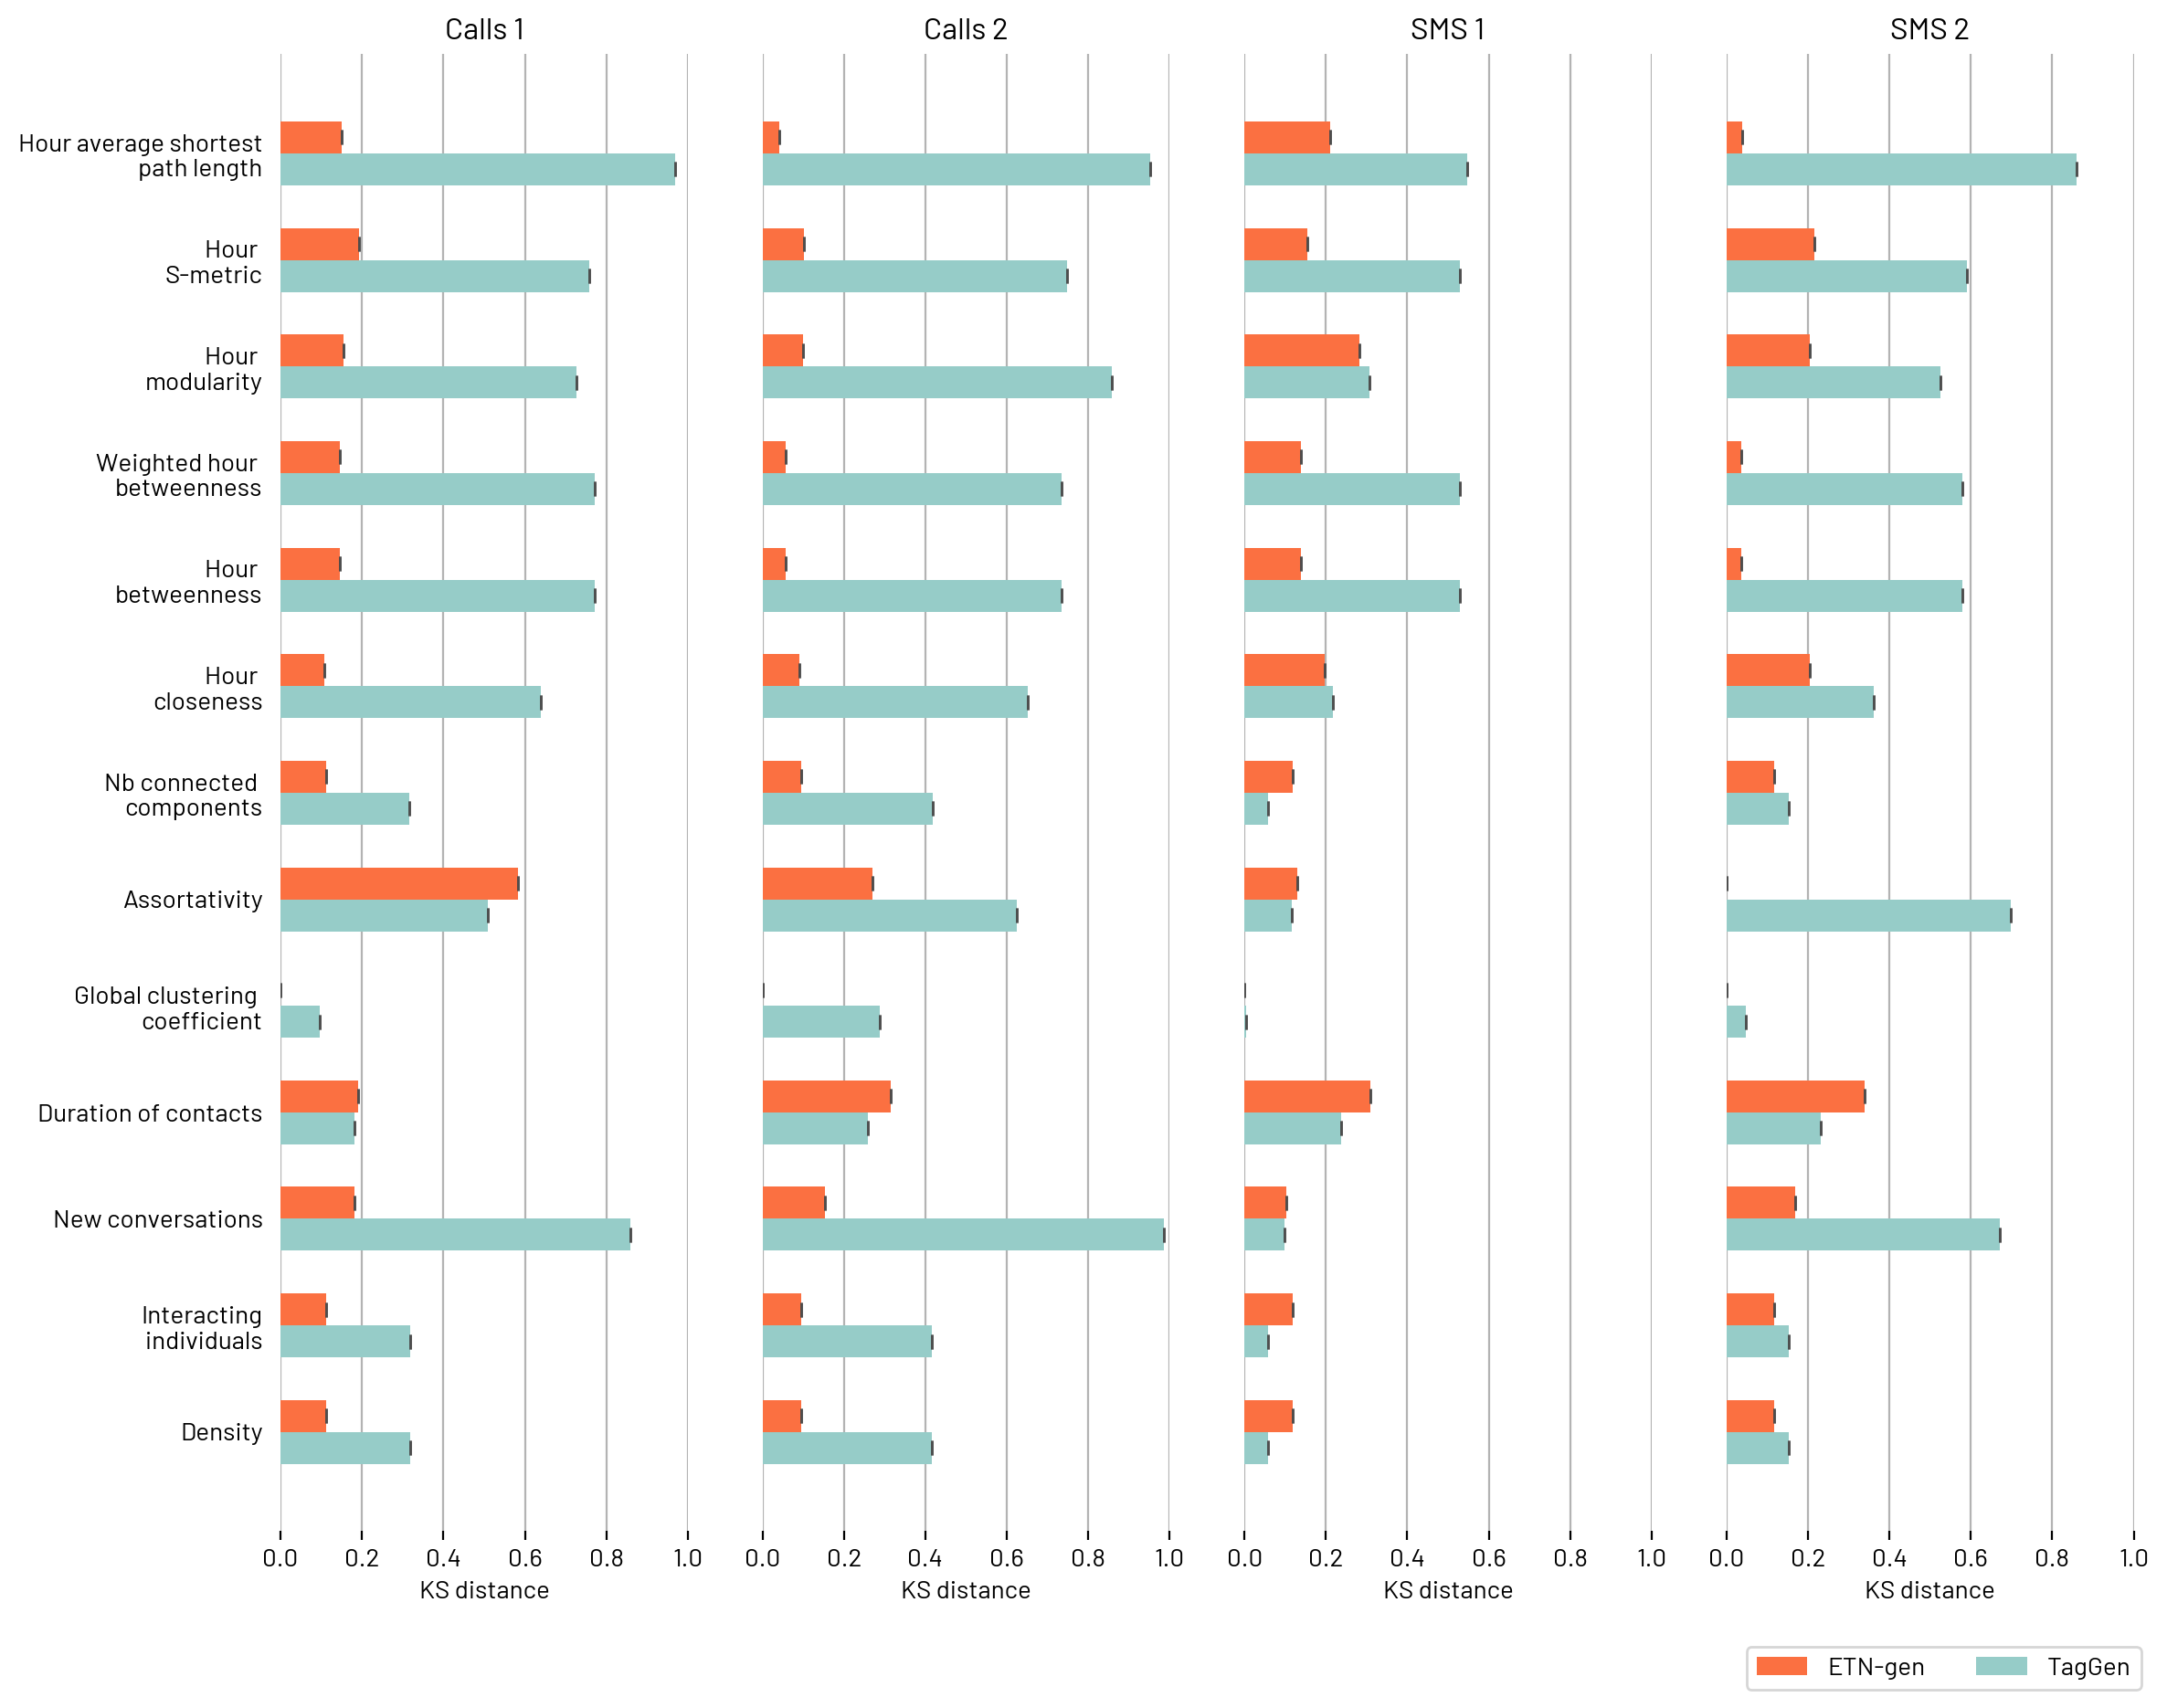

In [53]:
ORIGINAL_COLOR = '#474747' #dark grey
ETN_COLOR =  '#fb7041' #'#E5865E' # arancio
TAG_COLOR = '#96ccc8' # light blue
STM_COLOR = '#bad1f2' #8F2E27' # rosso
DYM_COLOR = '#559ca6' # teal
error_bar_style = dict(ecolor=ORIGINAL_COLOR, alpha=0.8, lw=1.5, capsize=3, capthick=1)

x = np.arange(13)
width = 0.3


fig, ax = plt.subplots(1,4,figsize=(12,9))

ax[0].title.set_text("Calls 1")
ax[0].barh(x + 0.15, x1dc[:,0], width, xerr=x1dc[:,1],label='ETN-gen',color=ETN_COLOR, error_kw=error_bar_style)
ax[0].barh(x - 0.15, x3dc[:,0], width, xerr=x3dc[:,1],label='TagGen',color=TAG_COLOR, error_kw=error_bar_style)

ax[0].set_yticklabels(names)
ax[0].set_yticks(x)


ax[2].title.set_text("SMS 1")
ax[2].barh(x + 0.15, x1ds[:,0], width, xerr=x1ds[:,1],label='ETN-gen',color=ETN_COLOR, error_kw=error_bar_style)
ax[2].barh(x - 0.15, x3ds[:,0], width, xerr=x3ds[:,1],label='TagGen',color=TAG_COLOR, error_kw=error_bar_style)

ax[1].title.set_text("Calls 2")
ax[1].barh(x + 0.15, x1fc[:,0], width, xerr=x1fc[:,1],label='ETN-gen',color=ETN_COLOR, error_kw=error_bar_style)
ax[1].barh(x - 0.15, x3fc[:,0], width, xerr=x3fc[:,1],label='TagGen',color=TAG_COLOR, error_kw=error_bar_style)

ax[3].title.set_text("SMS 2")
ax[3].barh(x + 0.15, x1fs[:,0], width, xerr=x1fs[:,1],label='ETN-gen',color=ETN_COLOR, error_kw=error_bar_style)
ax[3].barh(x - 0.15, x3fs[:,0], width, xerr=x3fs[:,1],label='TagGen',color=TAG_COLOR, error_kw=error_bar_style)


ax[1].set_yticks(x)
ax[1].set_yticklabels([" "," "," "," "," "," "," "," "," "," "," "," "," "],rotation=0)
ax[1].set_xlim(xmin=0)

ax[2].set_yticks(x)
ax[2].set_xlim(xmin=0)
ax[2].set_yticklabels([" "," "," "," "," "," "," "," "," "," "," "," "," "],rotation=0)

ax[3].set_yticks(x)
ax[3].set_xlim(xmin=0)
ax[3].set_yticklabels([" "," "," "," "," "," "," "," "," "," "," "," "," "],rotation=0)



ax[0].tick_params(bottom=True, right=False,left=False)
ax[0].set_axisbelow(True)
ax[0].xaxis.grid(True, color='#b3b3b3')
ax[0].yaxis.grid(False)

ax[1].tick_params(bottom=True, right=False,left=False)
ax[1].set_axisbelow(True)
ax[1].xaxis.grid(True, color='#b3b3b3')
ax[1].yaxis.grid(False)

ax[2].tick_params(bottom=True, right=False,left=False)
ax[2].set_axisbelow(True)
ax[2].xaxis.grid(True, color='#b3b3b3')
ax[2].yaxis.grid(False)

ax[3].tick_params(bottom=True, right=False,left=False)
ax[3].set_axisbelow(True)
ax[3].xaxis.grid(True, color='#b3b3b3')
ax[3].yaxis.grid(False)



ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].spines['bottom'].set_visible(False)



ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[1].spines['bottom'].set_visible(False)


ax[2].spines['top'].set_visible(False)
ax[2].spines['right'].set_visible(False)
ax[2].spines['left'].set_visible(False)
ax[2].spines['bottom'].set_visible(False)

ax[3].spines['top'].set_visible(False)
ax[3].spines['right'].set_visible(False)
ax[3].spines['left'].set_visible(False)
ax[3].spines['bottom'].set_visible(False)


ax[0].set_xlabel("KS distance")
ax[1].set_xlabel("KS distance")
ax[2].set_xlabel("KS distance")
ax[3].set_xlabel("KS distance")


ax[0].set_xlim(0,1)
ax[1].set_xlim(0,1)
ax[2].set_xlim(0,1)
ax[3].set_xlim(0,1)

fig.tight_layout()

ax[0].legend(loc='upper right',ncol = 5,bbox_to_anchor=(4.6, -0.07))
plt.savefig("COM_PHY_new_fig/topology_ks_SI_call_SMS.pdf", bbox_inches = 'tight')
plt.show()

# metrics on aggregated graph

Time aggregated measures: 
- edge strength
- close
- bet
- wbet

In [160]:
def load_topo_distributions2(generator,file_name):
    
    stre = np.load("topology_results/SI/"+generator+"/"+file_name+"/streng.npy",allow_pickle=True)
    close = np.load("topology_results/SI/"+generator+"/"+file_name+"/clo_agg.npy",allow_pickle=True)
    bet = np.load("topology_results/SI/"+generator+"/"+file_name+"/bet_agg.npy",allow_pickle=True)
    wbet = np.load("topology_results/SI/"+generator+"/"+file_name+"/wbet_agg.npy",allow_pickle=True)

    return stre[0],close,bet,wbet

def load_topo_original2(file_name):
    stre = np.load("topology_results/original_distributions/"+file_name+"/streng.npy",allow_pickle=True)
    close = np.load("topology_results/original_distributions/"+file_name+"/clo_agg.npy",allow_pickle=True)
    bet = np.load("topology_results/original_distributions/"+file_name+"/bet_agg.npy",allow_pickle=True)
    wbet = np.load("topology_results/original_distributions/"+file_name+"/wbet_agg.npy",allow_pickle=True)
 
    
    #stren = np.load("topology_results/original_distributions/"+file_name+"/streng.npy",allow_pickle=True)
    #nb_inter = np.load("topology_results/original_distributions/"+file_name+"/nb_interactions.npy",allow_pickle=True)
    
    return stre[0],close,bet,wbet


def compute_counts(ro,e):
    counts = []
    e = np.array(e)
    for i in range(len(ro)-1):
        r1 = ro[i]
        r2 = ro[i+1]
        ee = e[e>r1]
        count = ee[ee<=r2]
        counts.append(len(count))
    return counts

def compute_multpile_counts(ranges,ee):
    counts = []
    for e in ee:
        counts.append(compute_counts(ranges,e))
    return counts

# example of calculating the kl divergence between two mass functions
from math import log2
from scipy.stats import wasserstein_distance as em
from scipy.stats import ks_2samp


def comp_stat(ori,competitor,dist,names):
    res = dict()
    c = 0
    for comp in competitor:
        tmp = []
        if dist == "js":
            val = compute_kl_divergence(ori[c], comp, n_bins=50,js=True)
        elif dist == "kl":
            val = compute_kl_divergence(ori[c], comp, n_bins=50,js=False)
        elif dist == "em":
            val = em(ori[c][0],comp)
        elif dist == "ks":

            val = (ks_2samp(ori[c],comp)[0])


        tmp.append(val)
            
        res[names[c]] = (np.mean(tmp),np.std(tmp))
        c = c + 1 
        
    return res

def load_comp_metric2(file_name,dist="ks",names="None"):
    o_in = load_topo_original2(file_name)
    e_in = load_topo_distributions2("etngen",file_name)
    t_in = load_topo_distributions2("taggen",file_name)
    #d_in = load_topo_distributions2("dymgen",file_name)
    #s_in = load_topo_distributions2("stmgen",file_name)

    res_e = comp_stat(o_in,e_in,dist= dist,names=names)
    #res_d = comp_stat(o_in,d_in,dist= dist,names=names)
    #res_s = comp_stat(o_in,s_in,dist= dist,names=names)
    res_t = comp_stat(o_in,t_in,dist= dist,names=names)


    x1 = list(res_e.values())
    #x2 = list(res_s.values())
    x3 = list(res_t.values())
    #x4 = list(res_d.values())
   
    #return np.array(x1),np.array(x2),np.array(x3),np.array(x4)
    return np.array(x1),np.array(x3)


In [167]:
names = ['Edge Strength', 'Closeness', 'Betweenness', 'Weighted \nbetweenness']

dist = "ks"
x1h,x3h = load_comp_metric2("High_School12",dist=dist)
x1w,x3w = load_comp_metric2("High_School13",dist=dist)
x1s,x3s = load_comp_metric2("primary_school",dist=dist)

/tmp/ipykernel_28593/382310741.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_yticklabels(names)
/tmp/ipykernel_28593/382310741.py:86: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.tight_layout()


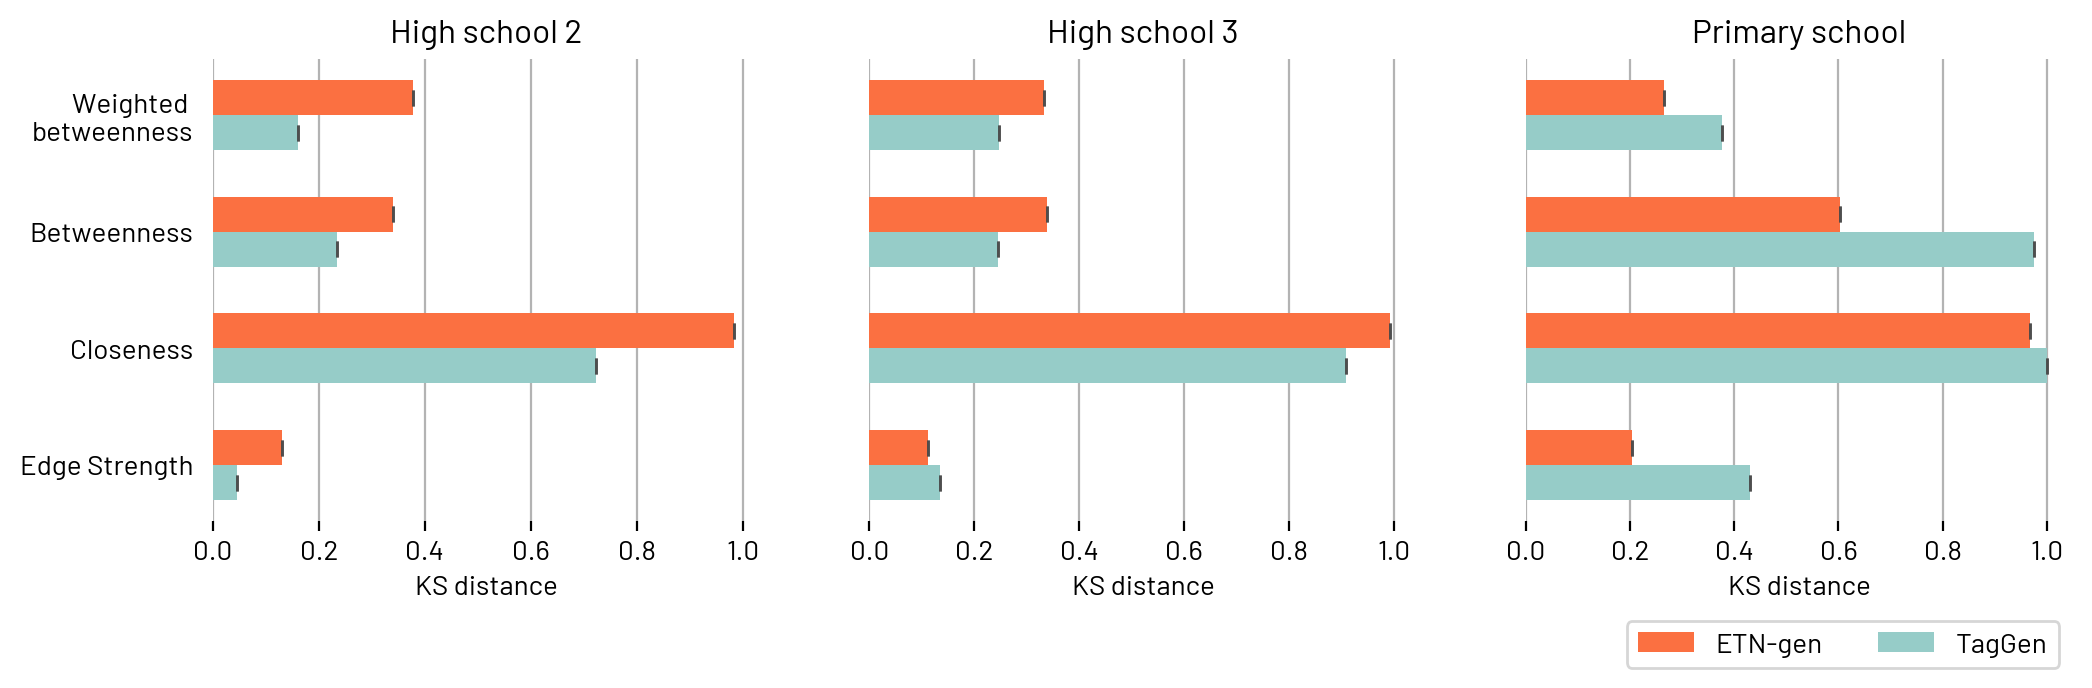

In [177]:

ORIGINAL_COLOR = '#474747' #dark grey
ETN_COLOR =  '#fb7041' #'#E5865E' # arancio
TAG_COLOR = '#96ccc8' # light blue
STM_COLOR = '#bad1f2' #8F2E27' # rosso
DYM_COLOR = '#559ca6' # teal
error_bar_style = dict(ecolor=ORIGINAL_COLOR, alpha=0.8, lw=1.5, capsize=3, capthick=1)

x = np.arange(4)
width = 0.3


fig, ax = plt.subplots(1,3,figsize=(12,3))

ax[0].title.set_text("High school 2")
ax[0].barh(x + 0.15, x1h[:,0], width, xerr=x1h[:,1],label='ETN-gen',color=ETN_COLOR, error_kw=error_bar_style)
ax[0].barh(x - 0.15, x3h[:,0], width, xerr=x3h[:,1],label='TagGen',color=TAG_COLOR, error_kw=error_bar_style)


ax[0].set_yticklabels(names)
ax[0].set_yticks(x)


ax[1].title.set_text("High school 3")
ax[1].barh(x + 0.15, x1w[:,0], width, xerr=x1w[:,1],label='ETN-gen',color=ETN_COLOR, error_kw=error_bar_style)
ax[1].barh(x - 0.15, x3w[:,0], width, xerr=x3w[:,1],label='TagGen',color=TAG_COLOR, error_kw=error_bar_style)


ax[2].title.set_text("Primary school")
ax[2].barh(x + 0.15, x1s[:,0], width, xerr=x1s[:,1],label='ETN-gen',color=ETN_COLOR, error_kw=error_bar_style)
ax[2].barh(x - 0.15, x3s[:,0], width, xerr=x3s[:,1],label='TagGen',color=TAG_COLOR, error_kw=error_bar_style)



ax[1].set_yticks(x)
#ax[1].set_yticklabels([" "," "," "," "," "," "],rotation=0)
ax[1].set_yticklabels([" "," "," "," "],rotation=0)
ax[1].set_xlim(xmin=0)

ax[2].set_yticks(x)
ax[2].set_xlim(xmin=0)
#ax[2].set_yticklabels([" "," "," "," "," "," "],rotation=0)
ax[2].set_yticklabels([" "," "," "," "],rotation=0)


ax[0].tick_params(bottom=True, right=False,left=False)
ax[0].set_axisbelow(True)
ax[0].xaxis.grid(True, color='#b3b3b3')
ax[0].yaxis.grid(False)

ax[1].tick_params(bottom=True, right=False,left=False)
ax[1].set_axisbelow(True)
ax[1].xaxis.grid(True, color='#b3b3b3')
ax[1].yaxis.grid(False)

ax[2].tick_params(bottom=True, right=False,left=False)
ax[2].set_axisbelow(True)
ax[2].xaxis.grid(True, color='#b3b3b3')
ax[2].yaxis.grid(False)



ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].spines['bottom'].set_visible(False)



ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[1].spines['bottom'].set_visible(False)


ax[2].spines['top'].set_visible(False)
ax[2].spines['right'].set_visible(False)
ax[2].spines['left'].set_visible(False)
ax[2].spines['bottom'].set_visible(False)


ax[0].legend(loc='upper right',ncol = 5,bbox_to_anchor=(3.4, -0.187))

ax[0].set_xlabel("KS distance")
ax[1].set_xlabel("KS distance")
ax[2].set_xlabel("KS distance")
fig.tight_layout()
plt.savefig("COM_PHY_new_fig/topology_ks_aggregated_SI_facetoface.pdf", bbox_inches = 'tight')
plt.show()

# sms calls

In [179]:
names = ['Edge Strength', 'Closeness', 'Betweenness', 'Weighted \nbetweenness']

dist = "ks"
x1h,x3h = load_comp_metric2("DTU_calls_1sett",dist=dist)
x1w,x3w = load_comp_metric2("DTU_SMS_1sett",dist=dist)
x1s,x3s = load_comp_metric2("FF_calls_1sett",dist=dist)
x1z,x3z = load_comp_metric2("FF_SMS_1sett",dist=dist)

In [180]:
x1s

array([[0.60812357, 0.        ],
       [1.        , 0.        ],
       [0.73469388, 0.        ],
       [0.71428571, 0.        ]])

/tmp/ipykernel_28593/263451426.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_yticklabels(names)
/tmp/ipykernel_28593/263451426.py:68: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.tight_layout()


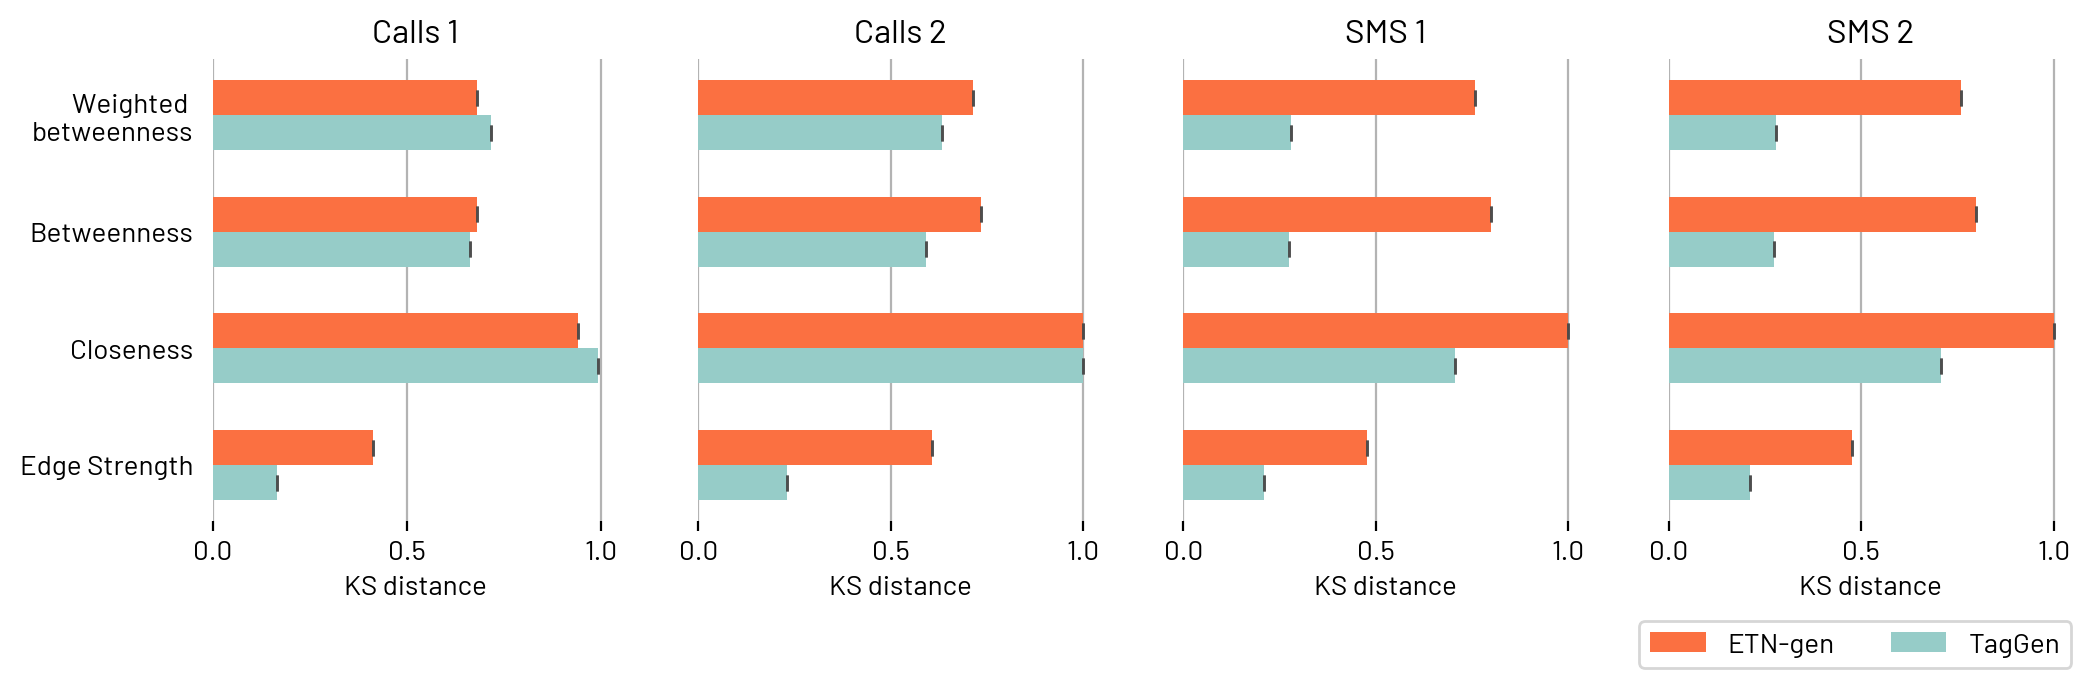

In [196]:

ORIGINAL_COLOR = '#474747' #dark grey
ETN_COLOR =  '#fb7041' #'#E5865E' # arancio
TAG_COLOR = '#96ccc8' # light blue
STM_COLOR = '#bad1f2' #8F2E27' # rosso
DYM_COLOR = '#559ca6' # teal
error_bar_style = dict(ecolor=ORIGINAL_COLOR, alpha=0.8, lw=1.5, capsize=3, capthick=1)

x = np.arange(4)
width = 0.3

fig, ax = plt.subplots(1,4,figsize=(12,3))

ax[0].title.set_text("Calls 1")
ax[0].barh(x + 0.15, x1h[:,0], width, xerr=x1h[:,1],label='ETN-gen',color=ETN_COLOR, error_kw=error_bar_style)
ax[0].barh(x - 0.15, x3h[:,0], width, xerr=x3h[:,1],label='TagGen',color=TAG_COLOR, error_kw=error_bar_style)
ax[0].set_yticklabels(names)
ax[0].set_yticks(x)


ax[2].title.set_text("SMS 1")
ax[2].barh(x + 0.15, x1w[:,0], width, xerr=x1w[:,1],label='ETN-gen',color=ETN_COLOR, error_kw=error_bar_style)
ax[2].barh(x - 0.15, x3w[:,0], width, xerr=x3w[:,1],label='TagGen',color=TAG_COLOR, error_kw=error_bar_style)


ax[1].title.set_text("Calls 2")
ax[1].barh(x + 0.15, x1s[:,0], width, xerr=x1s[:,1],label='ETN-gen',color=ETN_COLOR, error_kw=error_bar_style)
ax[1].barh(x - 0.15, x3s[:,0], width, xerr=x3s[:,1],label='TagGen',color=TAG_COLOR, error_kw=error_bar_style)



ax[3].title.set_text("SMS 2")
ax[3].barh(x + 0.15, x1w[:,0], width, xerr=x1w[:,1],label='ETN-gen',color=ETN_COLOR, error_kw=error_bar_style)
ax[3].barh(x - 0.15, x3w[:,0], width, xerr=x3w[:,1],label='TagGen',color=TAG_COLOR, error_kw=error_bar_style)



ax[1].set_yticks(x)
ax[1].set_yticklabels([" "," "," "," "],rotation=0)
ax[1].set_xlim(xmin=0)

ax[2].set_yticks(x)
ax[2].set_xlim(xmin=0)
ax[2].set_yticklabels([" "," "," "," "],rotation=0)


ax[3].set_yticks(x)
ax[3].set_xlim(xmin=0)
ax[3].set_yticklabels([" "," "," "," "],rotation=0)





for i in range(4):
    ax[i].tick_params(bottom=True, right=False,left=False)
    ax[i].set_axisbelow(True)
    ax[i].xaxis.grid(True, color='#b3b3b3')
    ax[i].yaxis.grid(False)

    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['left'].set_visible(False)
    ax[i].spines['bottom'].set_visible(False)

    ax[i].set_xlabel("KS distance")

ax[0].legend(loc='upper right',ncol = 2,bbox_to_anchor=(4.63, -0.187))
fig.tight_layout()
plt.savefig("COM_PHY_new_fig/topology_ks_aggregated_SI_call_SMS.pdf", bbox_inches = 'tight')
plt.show()